<a href="https://colab.research.google.com/github/vnsh69/projects-ML-DL/blob/main/cifar10_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
import matplotlib.pyplot as plt
def imageshow(index):
  plt.figure(figsize=(10,3))
  plt.imshow(x_train[index])
  plt.xlabel(class_names[y_train[index][0]])
  plt.show()

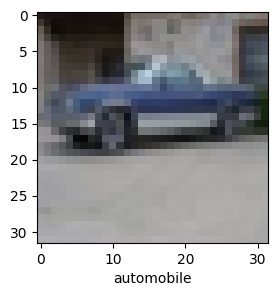

In [ ]:
imageshow(10000)

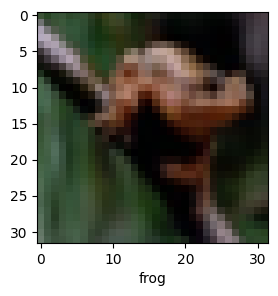

In [ ]:
imageshow(5000)

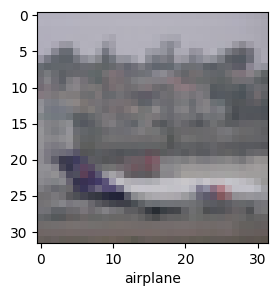

In [ ]:
imageshow(30000)

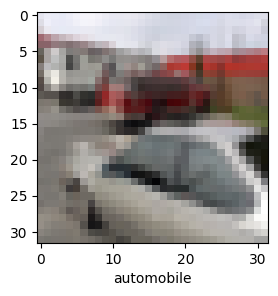

In [ ]:
imageshow(49999)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True)
test_data = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_data.flow(x_train, y_train, batch_size=32)
test_data = test_data.flow(x_test, y_test, batch_size=32)

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
feature_extractor_layer = hub.KerasLayer(resnet_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=(32,32,3)) # define the input image shape

model = tf.keras.Sequential([
        feature_extractor_layer,
        layers.Dense(10, activation='softmax', name='output_layer')
    ])

In [ ]:
model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
resnet_history =  model.fit(train_data,
                            steps_per_epoch=len(train_data),
                            epochs=14,
                            validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/14
1563/1563 [==============================] - 71s 45ms/step - loss: 109.3461 - accuracy: 0.1132 - val_loss: 108.8005 - val_accuracy: 0.0982
Epoch 2/14
1563/1563 [==============================] - 71s 46ms/step - loss: 109.3226 - accuracy: 0.1135 - val_loss: 108.8357 - val_accuracy: 0.1011
Epoch 3/14
1563/1563 [==============================] - 71s 46ms/step - loss: 109.4929 - accuracy: 0.1154 - val_loss: 108.9417 - val_accuracy: 0.1019
Epoch 4/14
1563/1563 [==============================] - 71s 45ms/step - loss: 109.4793 - accuracy: 0.1170 - val_loss: 108.9304 - val_accuracy: 0.1003
Epoch 5/14
1563/1563 [==============================] - 70s 45ms/step - loss: 109.6040 - accuracy: 0.1157 - val_loss: 108.9889 - val_accuracy: 0.1019
Epoch 6/14
1563/1563 [==============================] - 71s 45ms/step - loss: 109.5626 - accuracy: 0.1161 - val_loss: 109.2155 - val_accuracy: 0.1033
Epoch 7/14
1563/1563 [==============================] - 72s 46ms/step - loss: 109.7791 - accuracy: 0

In [ ]:
print(len(train_data))
print(len(test_data))

1563
313
